# EDSA Unsupervised Learning Sprint
## Movie Recommender Systems

<div align="center" style="width: 900px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="recommender_images.png"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=900px/>
</div>

### The team:
- Thapelo Makhalanyane
- Kabelo Mbewe
- Reitumetse Nchoe
- Mpho Nonyane
- Hercules Smith

### The Goal:
- To build a model than can produce an estimated rating for given user and movie combination (that doesn't yet exist) quickly and accurately. This part of the project focuses on the best possible model performance, within reason (we cannot train until the heat-death of the universe, for example)

## Steps:
1. Bring in our data and Explore it a bit, gathering some insights about our data.
2. Format our data in a way that allows us to perform unsupervised learning tasks.
3. Build and evaluate some models
4. Refine our favourite model
5. Produce a submission
6. Conclusion

## Data Overview
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

## Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

## Supplied Files
- `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
- `genome_tags.csv` - user assigned tags for genome-related scores
- `imdb_data.csv` - Additional movie metadata scraped from IMDB using the `links.csv` file.
- `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- `tags.csv` - User assigned for the movies within the dataset.
- `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
- `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

<br/>

---

<br/>

# Additional Information
The below information is provided directly from the MovieLens dataset description files:

### Ratings Data File Structure (`train.csv`)
All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

```
userId,movieId,rating,timestamp
```

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Tags Data File Structure (`tags.csv`)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

```
userId,movieId,tag,timestamp
```

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

### Movies Data File Structure (`movies.csv`)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

```
movieId,title,genres
```

Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

- Action
- Adventure
- Animation
- Children's
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western
- (no genres listed)

### Links Data File Structure (`links.csv`)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

```
movieId,imdbId,tmdbId
```

movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

### Tag Genome (genome-scores.csv and `genome_tags.csv`)
As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files. The file `genome_scores.csv` contains movie-tag relevance data in the following format:

```
movieId,tagId,relevance
```
The second file, `genome_tags.csv`, provides the tag descriptions for the tag IDs in the genome file, in the following format:

```
tagId,tag
```

# Step 1: Show me the data

(we start with imports)

In [2]:
import pandas as pd

from plotly import express as px

## helper functions

In [3]:
def demo_frame(df: pd.DataFrame):
    print(df.info())
    return df.head()

In [6]:
base_path = "./data"
genome_scores = pd.read_csv(f'{base_path}/genome_scores.csv')
genome_tags = pd.read_csv(f'{base_path}/genome_tags.csv')
imdb_data = pd.read_csv(f'{base_path}/imdb_data.csv')
# links = pd.read_csv(f'{base_path}/links.csv')  # we won't be using links at all
movies = pd.read_csv(f'{base_path}/movies.csv')
tags = pd.read_csv(f'{base_path}/tags.csv')
test = pd.read_csv(f'{base_path}/test.csv')
train = pd.read_csv(f'{base_path}/train.csv')

We'll start our journey by exploring the `genome` data, since that sounds the most interesting!

In [7]:
demo_frame(genome_scores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [8]:
demo_frame(genome_tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Every movie is tagged with one of 1'128 tags, each movie-tag pair has a `relevance` score which seems to indicate how *strongly* the `movie` is associated with the `tag`.

To use this data we may have to perform a `merge` and a `pivot`.
All code tha combines / cleans data in any way is in the `scripts` folder under `data_cleaning.py`. The functions here generates new csv files and places them in a folder called `cleaned` so we don't have to waste processor cycles recleaning the same data over-and-over.


In [99]:
genome_tag_vec = pd.read_csv('cleaned/genome_tag_vec.csv')

demo_frame(genome_tag_vec)


We know `Toy Story (1995)` has `movieId == 1`, so let's see what top 10 tags are most relevant to it:

In [ ]:
sorted_tags = genome_tag_vec[genome_tag_vec.movieId == 1].T.sort_values(0, ascending=False)
sorted_tags.iloc[1:11]

All of these are very agreeable tags! We might end up using this data to improve model performance later. For now, let's keep Exploring! We'll look at the IMDB data next:

In [ ]:
demo_frame(imdb_data)

Pretty self-explanatory; there is a need to clean the dataframe a bit - splitting on the pipe (|) and transforming `budget` to be numeric. Let's see what that looks like:

In [ ]:
imdb_data = pd.read_csv('cleaned/imdb_data.csv')

demo_frame(imdb_data)

Now we can mine some data about our movies!

In [ ]:
from collections import Counter
from scripts.helpers import flatten_list

unique_actors_per_movie = imdb_data.title_cast.str.split('|').fillna("").apply(set)
print("Median # of actors per movie:", unique_actors_per_movie.apply(len).median().round().astype(int))
print("Total # of actors (in dataset):", len(set.union(*unique_actors_per_movie)))

actor_by_movies = pd.Series(Counter(flatten_list(unique_actors_per_movie))).sort_values(ascending=True)

fig = px.bar(
    data_frame=actor_by_movies.iloc[-20:], 
    x=0, 
    height=640,
    labels={"0": "# of Movies"}, 
    orientation='h', 
    title='Number of movies per actor'
)
fig.show()

In [ ]:
director_by_movies = pd.Series(Counter(imdb_data.director)).sort_values(ascending=True)

fig = px.bar(
    data_frame=director_by_movies.iloc[-20:-2], 
    x=0, 
    height=640,
    labels={"0": "# of Movies"}, 
    orientation='h', 
    title='Number of movies per director'
)
fig.show()

In [ ]:
movie_keywords = imdb_data.plot_keywords.str.split('|').fillna("").apply(set)
keyword_by_movies = pd.Series(Counter(flatten_list(movie_keywords))).sort_values(ascending=True)

fig = px.bar(
    data_frame=keyword_by_movies.iloc[-20:], 
    x=0, 
    height=640,
    labels={"0": "# of Movies"}, 
    orientation='h', 
    title='Top Keywords'
)
fig.show()

In [11]:
from wordcloud import WordCloud, STOPWORDS
import codecs
import imageio
import base64
import numpy as np

from matplotlib import pyplot as plt

mask = imageio.imread('assets/wc_mask.jpg')

def gen_wordcloud(word_freq, title, savefig=False):
    plt.figure(figsize=(16, 12))
    wc = WordCloud(colormap='magma', mask=mask, background_color=None, max_words=1_000, mode="RGBA")
    wc.generate_from_frequencies(word_freq)
    plt.title(title, fontsize=12)
    plt.axis("off")
    plt.margins(tight=True)
    plt.imshow(wc, interpolation="bilinear")
    if savefig:
        plt.savefig(f'{title}.png', transparent=True, bbox_inches='tight', dpi=200)
    plt.show()
    
gen_wordcloud(keyword_by_movies, "Most Common Words (Overall)", savefig=False)

NameError: name 'keyword_by_movies' is not defined

It seems people are into some... people like what they like ;)

Let's quickly take a look at `movies.csv`:

In [ ]:
demo_frame(movies)

It would be great to extract the year from the title... if only there was a pre-cleaned version to look at...

In [ ]:
# hah, there is!
movies= pd.read_csv('cleaned/movies.csv')

demo_frame(movies)

Excellent! Genres aren't too interesting, let's take a quick peak at movie releases per year and move on!

In [ ]:
fig = px.histogram(movies, x='year', nbins=100, title='Movies released per year')
fig.show()

Not really any major insights here... The number of movies released per year is increasing over time - but that's relatively obvious. Later on, once we've brought in `train.csv` (which contains some timestamp info) we might be able to draw more insightful... insights.

Let's keep Exploring - `tags.csv` is next. We'll give it the same treatment we gave the plot keywords above:

In [ ]:
gen_wordcloud(pd.Series(Counter(tags.tag)), "Most Common Words (Overall)", savefig=False)

There are definitely some interesting tags here! We could potentially find similar users by how they tagged movies in some way! Let's carry on; The real meat of our data - the `train.csv` file!

In [ ]:
demo_frame(train)

Let's first how many movies each user has rated:

In [ ]:
rating_count = train.groupby('userId').movieId.count().sort_values(ascending=False)
print(rating_count.iloc[:10])
print(rating_count.describe())

Our top user has rated almost 13 thousand movies! the average number of ratings per user is 61, with the 25th percentile being 14 ratings. The median number of ratings is 28.

Considering ratings as features of users, to help recommend new content (Collaborative Filtering) definitely seems like a good idea as well.

In [ ]:
train.rating.describe()

The median rating given is 3.5, the mean is only slightly more at 3.53.

Now about those *"more insightful insights"*, let's see if there is any relationship between the age of a movie and the rating given:

In [ ]:
train['timestamp'] = pd.to_datetime(train["timestamp"], unit='s')
demo_frame(train)

In [ ]:
combined = train.merge(movies[['movieId', 'year']], on='movieId', how='left')
combined['delay'] = train.timestamp.dt.year - combined.year

combined.head()

Now we can easily, per movie, see how it's ratings change over time (if at all)

In [ ]:
subset = combined[(combined.year > 1950)]

In [ ]:
by_delay = subset.groupby(['movieId', 'delay'], as_index=False).rating.agg(['mean', 'count'])
subset = by_delay[by_delay['count'] > 100].reset_index()
subset

In [ ]:
subset['rating_diff'] = subset.groupby('movieId')['mean'].diff(1).fillna(0)

In [ ]:
fig = px.scatter(
    subset,
    x='delay',
    y='rating_diff',
    color='rating_diff',
    title='Change in rating over time'
)
fig.update_layout(showlegend=False)
fig.show()

What this colorful mess above is saying is: Movie ratings don't tend to change very much over time.

# Step 2: Exploratory Data Analysis

Hiding visualisation code

In [40]:
from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)

##### Top 20 Actors by Featured Movies

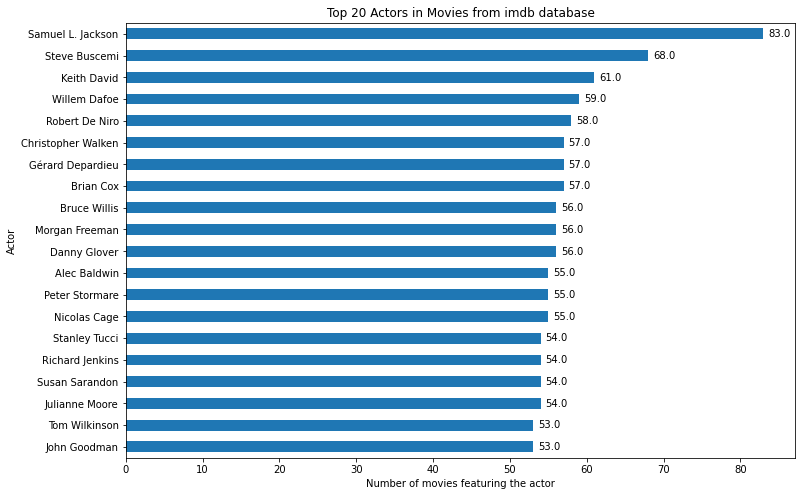

In [36]:

movies_actor = pd.DataFrame(imdb_data[['movieId', 'title_cast']],columns=['movieId', 'title_cast'])
# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))
# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_actor = pd.DataFrame([(tup.movieId, d) for tup in movies_actor.itertuples() for d in tup.title_cast],columns=['movieId','title_cast'])
#movies_actor.groupby(['title_cast']).count()
movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name="count")
movies_actor =movies_actor.sort_values(by='count',ascending=False)
movies_actor = movies_actor .head(20)
movies_actor =movies_actor.sort_values(by='count',ascending=True)

y_labels =movies_actor['title_cast']
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = movies_actor['count'].plot(kind='barh')
ax.set_title('Top 20 Actors in Movies from imdb database')
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('Actor')
ax.set_yticklabels(y_labels)
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.1f}".format(x_value)
    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords="offset points",va='center',ha=ha)
 
hide_toggle()

##### Top 10 Genres Combinations by Budget

Real-time exchange rates were found on this link: https://api.exchangerate-api.com/v4/latest/USD

In [97]:
#combining movies and imbd dataframes
merged_inner = pd.merge(left=imdb_data, right=movies, left_on='movieId', right_on='movieId')
sorted_df = merged_inner.sort_values(by=['budget'], ascending=False)
sorted_df['budget_in_USD'] = ''
#writing $ as USD
for i,row in sorted_df.iterrows():
    budget_ = str(row['budget'])
    if budget_[:1] == '$':
        budget_ = 'USD'+budget_[1:]
        sorted_df.at[i,'budget'] = budget_
                  
sorted_df.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,budget_in_USD
14048,72949,Frank Rautenbach|Jeanne Neilson|Hamilton Dlami...,Regardt van den Bergh,NaN,"ZAR10,000,000",farmer|africa|christian|christian film,Faith Like Potatoes (2006),Drama,
21416,112273,Eliú Armas|Fernando Moreno|Beto Benites|Gonzal...,Rohan Jones,97.0,"VEB4,273,248",football|dream|slum|tryout,Brother (Hermano) (2010),Drama,


In [98]:
#Base - USD
rates = {"USD":1,"AED":3.67,"AFN":80.23,"ALL":103.73,"AMD":494.82,"ANG":1.79,"AOA":647.59,"ARS":96.27,
         "AUD":1.35,"AWG":1.79,"AZN":1.7,"BAM":1.65,"BBD":2,"BDT":84.85,"BGN":1.65,"BHD":0.376,
         "BIF":1970.11,"BMD":1,"BND":1.35,"BOB":6.89,"BRL":5.1,"BSD":1,"BTN":74.61,"BWP":11.02,
         "BYN":2.54,"BZD":2,"CAD":1.26,"CDF":1978.53,"CHF":0.919,"CLP":753.22,"CNY":6.47,
         "COP":3797.23,"CRC":619.62,"CUC":1,"CUP":25.75,"CVE":93.28,"CZK":21.62,"DJF":177.72,
         "DKK":6.31,"DOP":56.94,"DZD":134.69,"EGP":15.69,"ERN":15,"ETB":43.84,"EUR":0.846,
         "FJD":2.08,"FKP":0.724,"FOK":6.31,"GBP":0.724,"GEL":3.12,"GGP":0.724,"GHS":5.95,"GIP":0.724,
         "GMD":51.8,"GNF":9773.06,"GTQ":7.74,"GYD":208.38,"HKD":7.77,"HNL":23.96,"HRK":6.37,
         "HTG":93.61,"HUF":304.35,"IDR":14519.02,"ILS":3.29,"IMP":0.724,"INR":74.61,"IQD":1453.15,
         "IRR":41831.17,"ISK":123.56,"JMD":154.35,"JOD":0.709,"JPY":110.1,"KES":108.17,"KGS":84.43,
         "KHR":4054.24,"KID":1.35,"KMF":416.19,"KRW":1142.31,"KWD":0.3,"KYD":0.833,"KZT":426.76,
         "LAK":9485.59,"LBP":1507.5,"LKR":199.2,"LRD":171.96,"LSL":14.42,"LYD":4.49,"MAD":8.94,
         "MDL":18,"MGA":3894.67,"MKD":52.13,"MMK":1647.09,"MNT":2838.26,"MOP":8,"MRU":35.99,"MUR":42.85,
         "MVR":15.42,"MWK":807.55,"MXN":19.9,"MYR":4.21,"MZN":63.86,"NAD":14.42,"NGN":430.04,"NIO":35.27,
         "NOK":8.83,"NPR":119.38,"NZD":1.43,"OMR":0.384,"PAB":1,"PEN":3.94,"PGK":3.52,"PHP":50.34,
         "PKR":159.38,"PLN":3.88,"PYG":6819.25,"QAR":3.64,"RON":4.17,"RSD":99.48,"RUB":74.15,
         "RWF":1005.43,"SAR":3.75,"SBD":7.93,"SCR":14.35,"SDG":440.9,"SEK":8.67,"SGD":1.35,"SHP":0.724,
         "SLL":10210.27,"SOS":576.25,"SRD":21.13,"SSP":177.57,"STN":20.73,"SYP":1302.2,"SZL":14.42,
         "THB":32.78,"TJS":11.31,"TMT":3.5,"TND":2.78,"TOP":2.24,"TRY":8.54,"TTD":6.73,"TVD":1.35,
         "TWD":27.97,"TZS":2315.81,"UAH":27.25,"UGX":3544.71,"UYU":43.87,"UZS":10530.66,"VES":3536944.38,
         "VND":22988.07,"VUV":110.27,"WST":2.55,"XAF":554.92,"XCD":2.7,"XDR":0.702,"XOF":554.92,
         "XPF":100.95,"YER":251.02,"ZAR":14.42,"ZMW":22.62,"VEB":24343118.96,"SIT":202.99,"RUR":74.08,
         "PTE":169.81,"NLG":1.86703,"LVL":0.595275,"ITL":1640.03,"FRF":5.55585,"FIM":5.03602,"ESP":0.85,
         "DEM":1.65681,"BGL":1.66,"BEF":34.1678,"ATS":11.66}

def USD_currency_converter(amount):
    amount = str(amount)
    currency = amount[:3]
    value = amount[3:]
    value = value.replace(",","")
    USD_amount = float(value)/float(rates[currency])
    USD_amount = str(USD_amount)
    final_USD_Amount = "USD"+USD_amount
    return final_USD_Amount


for i,row in sorted_df.iterrows():
    budget_ = str(row['budget'])
    budget_currency = budget_[:3]
    if budget_currency != "USD" or budget_currency != np.nan or budget_currency != '':
        sorted_df.at[i,'budget_in_USD'] = USD_currency_converter(budget_)


'\nfor i,row in sorted_df.iterrows():\n    budget_ = str(row[\'budget\'])\n    budget_currency = budget_[:3]\n    if budget_currency != "USD" or budget_currency != np.nan or budget_currency != \'\':\n        sorted_df.at[i,\'budget_in_USD\'] = USD_currency_converter(budget_)\n'

##### Most Common Genres

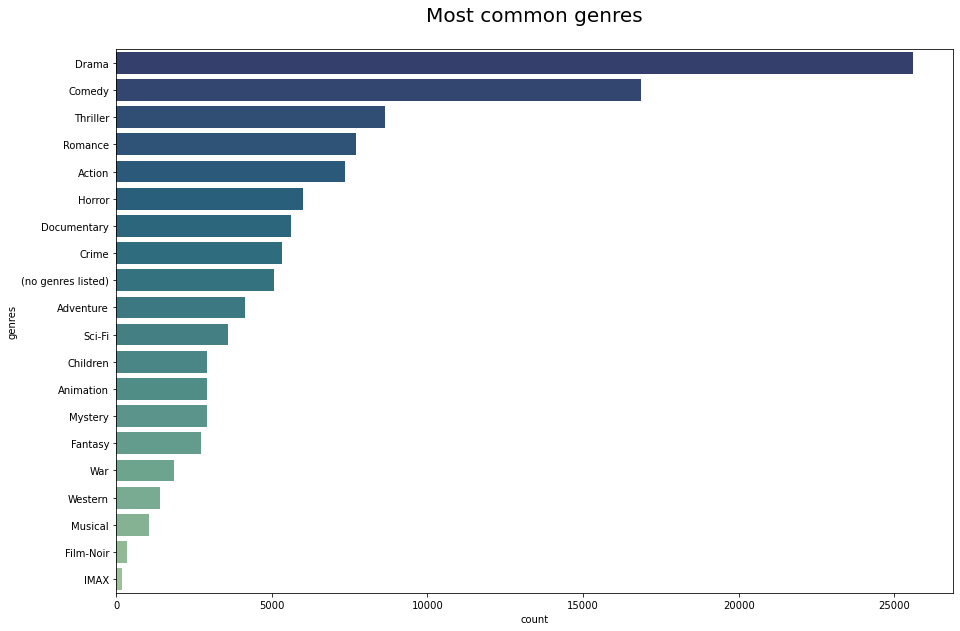

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],columns=['movieId', 'genres'])
# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='crest_r')
plt.show()
hide_toggle()

##### Keywords Popularity

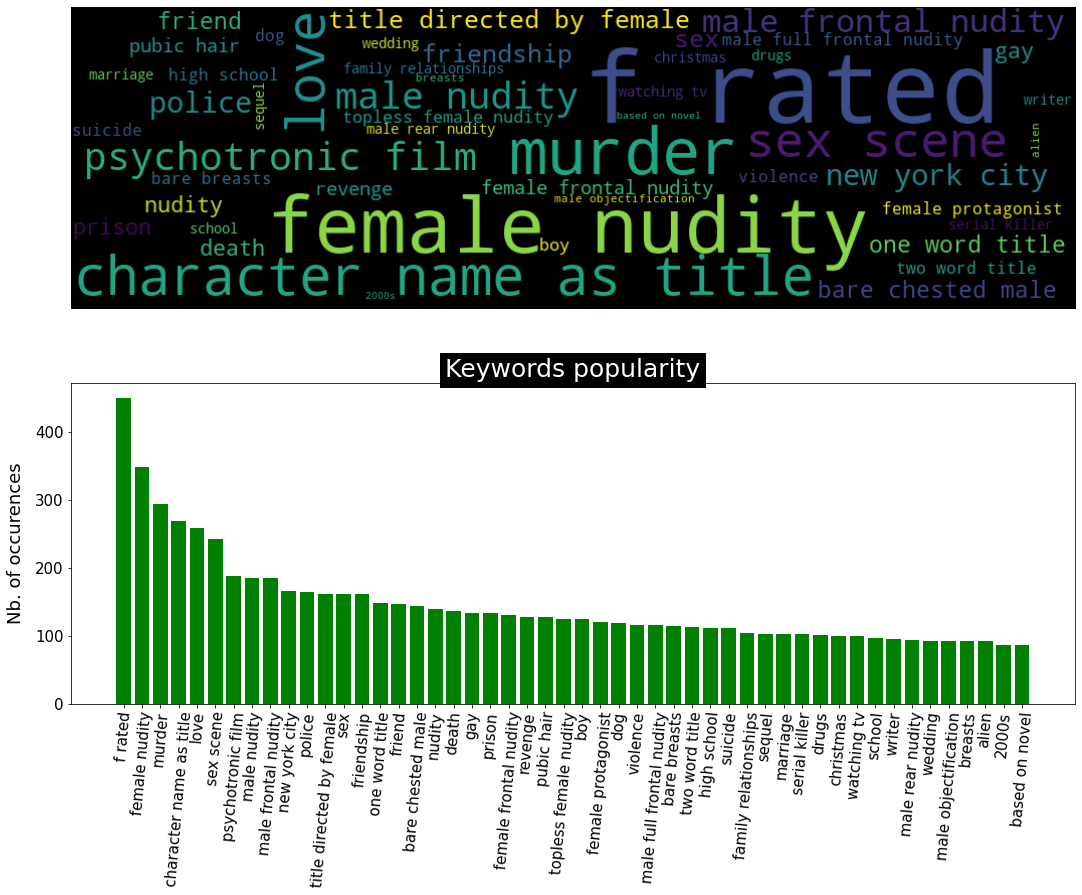

In [38]:
#Function to create list of keywords in dataset
set_keywords = set()
for liste_keywords in imdb_data['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
    
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

#Calling function gives us access to a list of keywords sorted in decreasing order
keyword_occurences, dum = count_word(imdb_data, 'plot_keywords', set_keywords)

# WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
# Define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      #color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
# HISTOGRAM
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()
hide_toggle()

# Step 3: Preprocessing

We've done most of our preprocessing in our `data_cleaning.py` script. We include the code here for convenience:

```python
def clean_genome():
    genome_scores = pd.read_csv("data/genome_scores.csv")
    genome_tags = pd.read_csv("data/genome_tags.csv")

    genome_data = genome_scores.merge(genome_tags, on="tagId")

    genome_tag_vec = genome_data.pivot(
        index="movieId", columns="tag", values="relevance"
    )
    genome_tag_vec["movieId"] = genome_tag_vec.index

    cols = ["movieId"] + [col for col in genome_tag_vec.columns if col != "movieId"]
    genome_tag_vec = genome_tag_vec[cols]
    genome_tag_vec.reset_index(inplace=True, drop=True)
    genome_tag_vec.to_csv(
        "cleaned/genome_tag_vec.csv",
        index=False,
    )


def clean_imdb():
    imdb_data = pd.read_csv("data/imdb_data.csv")
    budget_to_num = lambda budget: int("".join([c for c in budget if c.isnumeric()]))

    imdb_data["budget"] = imdb_data["budget"].apply(
        lambda b: np.nan if b is np.nan or b[0] != "$" else budget_to_num(b)
    )
    imdb_data.title_cast.fillna("", inplace=True)
    imdb_data.director.fillna("", inplace=True)
    imdb_data.runtime.fillna(int(imdb_data.runtime.median()), inplace=True)
    imdb_data.budget.fillna(int(imdb_data.budget.median()), inplace=True)
    imdb_data.plot_keywords.fillna("", inplace=True)

    imdb_data.to_csv(
        "cleaned/imdb_data.csv",
        index=False,
    )


def clean_movies():
    movies = pd.read_csv("data/movies.csv")

    movies["year"] = (
        movies.title.str.strip()
        .str[-6:]
        .str.extract(r"\(([0-9]{4})\)")
        .fillna(0)
        .astype(int)
    )

    normal_year_mean = movies[movies.year != 0].year.median()
    movies["year"].replace(0, normal_year_mean, inplace=True)

    movies["title"] = movies.title.str.strip().str.replace(
        r"\(([0-9]{4})\)", "", regex=True
    )
    movies["title"] = (
        movies["title"].str.strip().str.replace(r"(.*), The$", r"The \1", regex=True)
    )
    movies["genres"] = movies.genres.str.replace(
        "(no genres listed)", "unknown", regex=False
    )

    movies.to_csv(
        "cleaned/movies.csv",
        index=False,
    )
```


# Step 4: Bring in the models!

Finally! Am I right? First we need to talk about the types of models for recommendations:

There are in essence 3:
- Content-based filtering
- Collaborative filtering
- Hybrid (combine the 2 above + some other stuff)

Scary-sounding stuff right? Basically; All recommendation is about showing a user things they'll like. How do we know what they'll like?
- based on what else they've liked, ie. we find *content* that is similar to what they've already liked
- based on what similar people have liked, ie. our users *collaborate* (work together) to suggest things to each other (indirectly)

How we determine similarity is largely an embedding problem with some math sprinkled in - we don't need to get into too much details. In essence we try to represent each *thing* as a vector (think like a 2d (x, y) point in space, but with more dimentions), and then through the magic of math & information theory things that are similar *should* be close together (either measure by distance between them or angle between them).


We'll start off by looking at **collaborative models**
## Collaborative Filtering


In [ ]:
# basic models
from surprise import NormalPredictor, BaselineOnly
# knn based models
from surprise import KNNBasic, KNNWithMeans, KNNBaseline
# matrix factorization models
from surprise import SVD, SVDpp, NMF
# other clustering models
from surprise import SlopeOne, CoClustering

# some tools to bring in our data
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV

We'll start off by using only the default hyperparameters for all models, and comparing them on the MovieLens 100k dataset. Then we'll compare them on a random sample of our data; finally we'll pick about 3 models to GridSearch, find the best parameters, and then cross validate them on the full training set

In [ ]:
models = (
    NormalPredictor, BaselineOnly, 
    KNNBasic, KNNWithMeans, KNNBaseline, 
    SVD, SVDpp, NMF, 
    SlopeOne, CoClustering
)

In [ ]:
ml100k = Dataset.load_builtin('ml-100k')

In [ ]:
results = {
    "model": [],
    "train_rmse_mean": [],
    "train_rmse_std": [],
    "test_rmse_mean": [],
    "test_rmse_std": [],
    "fit_time_mean": [],
    "fit_time_std": [],
    "test_time_mean": [],
    "test_time_std": [],
}
for idx, model in enumerate(models):
    print(idx, model.__name__)
    result = cross_validate(
        algo=model(), 
        data=ml100k, 
        measures=['rmse'], 
        n_jobs=-1, 
        return_train_measures=True
    )
    results['model'].append(model.__name__)
    results['train_rmse_mean'].append(result['train_rmse'].mean())
    results['train_rmse_std'].append(result['train_rmse'].std())

    results['test_rmse_mean'].append(result['test_rmse'].mean())
    results['test_rmse_std'].append(result['test_rmse'].std())

    results['fit_time_mean'].append(np.array(result['fit_time']).mean())
    results['fit_time_std'].append(np.array(result['fit_time']).std())

    results['test_time_mean'].append(np.array(result['test_time']).mean())
    results['test_time_std'].append(np.array(result['test_time']).std())

In [ ]:
result_df = pd.DataFrame(results).set_index('model', drop=True)
result_df.sort_values("test_rmse_mean")

Clearly we don't need to consider the `NormalPredictor` (which is essentially just random guessing) any further. We might also exclude all models that performed worse than `BaselineOnly`, since it's just guessing means - doing worse than this isn't really valuable.

We should also consider overfitting - let's look at the difference between train and test RMSE across all models:

In [ ]:
(result_df.train_rmse_mean - result_df.test_rmse_mean).abs().sort_values()

Clearly All our complex - read matrix factorization - models are overfitting quite a bit! Thankfully this can be alleviated by increasing the regularisation hyperparamter; something we'll get to later.

Let's first run the same test on the MovieLens 1M dataset - that should prove insightful too!

In [ ]:
ml1m = Dataset.load_builtin('ml-1m')

results_1m = {
    "model": [],
    "train_rmse_mean": [],
    "train_rmse_std": [],
    "test_rmse_mean": [],
    "test_rmse_std": [],
    "fit_time_mean": [],
    "fit_time_std": [],
    "test_time_mean": [],
    "test_time_std": [],
}
for idx, model in enumerate(models):
    print(idx, model.__name__)
    result = cross_validate(
        algo=model(), 
        data=ml1m, 
        measures=['rmse'], 
        n_jobs=-1, 
        return_train_measures=True
    )
    results_1m['model'].append(model.__name__)
    results_1m['train_rmse_mean'].append(result['train_rmse'].mean())
    results_1m['train_rmse_std'].append(result['train_rmse'].std())

    results_1m['test_rmse_mean'].append(result['test_rmse'].mean())
    results_1m['test_rmse_std'].append(result['test_rmse'].std())

    results_1m['fit_time_mean'].append(np.array(result['fit_time']).mean())
    results_1m['fit_time_std'].append(np.array(result['fit_time']).std())

    results_1m['test_time_mean'].append(np.array(result['test_time']).mean())
    results_1m['test_time_std'].append(np.array(result['test_time']).std())

In [ ]:
result_df_1m = pd.DataFrame(results_1m).set_index('model', drop=True)
result_df_1m.sort_values("test_rmse_mean")

In [ ]:
(result_df.train_rmse_mean - result_df.test_rmse_mean).abs().sort_values()

We see roughly the same amount of overfitting, with drastically better accuracy scores. One thing to note is that our amount of data is roughly 10x more, let's see how much longer the models took to train:

In [ ]:
((result_df_1m - result_df) / result_df).sort_values('test_rmse_mean', ascending=True)

Some models took **much** longer than others, specifically `KNNBasic` and `KNNWithMeans`. A quick look at the code reveals that both of these are implemented in pure python - so there is much room for improvement.

Still though, our only reasonable options seem to be `SVD` and `SVDpp`. `SVDpp` trains **much** more slowly than `SVD`, but at least it shows similar algorithmic complexity while providing accurate results.

Next let's explore content-based models:

## Content-based Filtering

We'll first combine all of the data we have on any movie into a single massive dataset:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

from sklearn.metrics.pairwise import cosine_similarity

from scipy import sparse

import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

In [ ]:
full_combine = (
    movies
    .merge(imdb_data,      on="movieId", how="left")
    .merge(genome_tag_vec, on="movieId", how="left")
    .set_index("movieId", drop=True)
)

normal_year_mean = full_combine[full_combine.year != 0].year.mean()
full_combine['year'].replace(0, normal_year_mean, inplace=True)

# movies.year.fillna(int(movies.year.median()), inplace=True)
# movies.genres.fillna("<unknown>", inplace=True)
full_combine.title = full_combine.title.str.strip().str.replace(r"(.*), The$", r"The \1", regex=True)
full_combine.title_cast.fillna("", inplace=True)
full_combine.director.fillna("", inplace=True)
full_combine.runtime.fillna(int(full_combine.runtime.median()), inplace=True)
full_combine.budget.fillna(int(full_combine.budget.median()), inplace=True)
full_combine.plot_keywords.fillna("", inplace=True)

full_combine['cast_size'] = full_combine.title_cast.str.split('|').apply(len)
full_combine['genre_count'] = full_combine.genres.str.split('|').apply(len)

movie_groups = train.set_index('movieId', drop=True).groupby('movieId')
full_combine['rating_mean'] = movie_groups.rating.mean()
full_combine['rating_std'] = movie_groups.rating.std().fillna(0)

q3 = movie_groups.rating.quantile(0.75)
q1 = movie_groups.rating.quantile(0.25)

full_combine['rating_iqr'] =  q3 - q1
full_combine['rating_count'] = movie_groups.apply(len)

full_combine.fillna(0, inplace=True)

full_combine['movieId'] = full_combine.index.values
full_combine.reset_index(inplace=True, drop=True)
full_combine.head()

This humongus dataframe allows us to easily build some feature vectors; first we'll build one for genres:

In [ ]:
features = []

In [ ]:
genre_vectrz = CountVectorizer(token_pattern=r"[A-z\-]+", min_df=2)
genre_vec = genre_vectrz.fit_transform(full_combine.genres)
print("Genre Tokens:", len(genre_vectrz.get_feature_names()))
features.extend(genre_vectrz.get_feature_names())

We'll repeat this process for cast, director, and plot keywords, and we'll even sprinkle in some of those genome tags.

In [ ]:
cast_vectrz = CountVectorizer(token_pattern=r"[^\|]+", min_df=20)
cast_vec = cast_vectrz.fit_transform(full_combine.title_cast)
print("Cast Tokens:", len(cast_vectrz.get_feature_names()))
features.extend(cast_vectrz.get_feature_names())

In [ ]:
director_vectrz = CountVectorizer(token_pattern=r".+", min_df=10, stop_words=['see full summary'])
director_vec = director_vectrz.fit_transform(full_combine.director)
print("Director Tokens:", len(director_vectrz.get_feature_names()))
features.extend(director_vectrz.get_feature_names())

In [ ]:
plot_vectrz = CountVectorizer(token_pattern=r"[^\|]+", min_df=10, stop_words=stopwords)
plot_vec = plot_vectrz.fit_transform(full_combine.plot_keywords)
print("Plot KW Tokens:", len(plot_vectrz.get_feature_names()))
features.extend(plot_vectrz.get_feature_names())

In [ ]:
genome_features = [col for col in genome_tag_vec.columns if col != 'movieId']
features.extend(genome_features)
sparse_genome = sparse.csr_matrix(full_combine[genome_features])

Now we can easily combined all of these different sparse matrices to produce on final one:

In [ ]:
extra_features = ["year", "runtime", "budget", "rating_mean", "rating_std", "rating_iqr", "rating_count"]
features.extend(extra_features)

extra_features = full_combine[extra_features]

scaler = MinMaxScaler()
transformed = scaler.fit_transform(extra_features)
std_extra_sparse = sparse.csr_matrix(transformed)

tfidf_vecs = sparse.hstack([
    # title_vec,
    genre_vec,
    cast_vec,
    director_vec,
    plot_vec,
]).tocsr()

vecs = sparse.hstack([tfidf_vecs, sparse_genome, std_extra_sparse])
norm = Normalizer(copy=True)
norm_vecs = norm.transform(vecs)
norm_vecs.shape

We use the `Normalizer` since the cosine similarity between any 2 (tf normalized) vectors is the same as their dot-product. Thus we can now easily get a list of the top n similar movies to a specified movie:

In [ ]:
from collections import OrderedDict

def top_n_similar_to(movieId: int, n=10) -> OrderedDict:
    results = dict()
    movie_idx = movies[movies['movieId'] == movieId].index[0]
    similarities = norm_vecs.dot(norm_vecs.getrow(movie_idx).transpose()).toarray().flatten()
    top_n = similarities.argsort(axis=0)[-n-1:-1][::-1]

    for similar_idx in top_n:
        title = full_combine.iloc[similar_idx].title
        sim = round(similarities[similar_idx] * 100.0, 0)
        results[title] = (sim, similar_idx)
        
    return OrderedDict(sorted(results.items(), key=lambda kv: kv[1], reverse=True))

def batch_similar_to(movies: [int], n=10):
    results = dict()
    for mid in movies:
        res = top_n_similar_to(mid, n=n)
        for movie, (sim, idx) in res.items():
            if (movie in results) and (results[movie][0] < sim):
                results[movie] = (sim, idx)
            else:
                results[movie] = (sim, idx)

    return OrderedDict(sorted(results.items(), key=lambda kv: kv[1], reverse=True)[:n])

And a quick demo:

In [ ]:
avengers = 89745
avengers2 = 122892
amazing_spiderman = 95510
fault_in_stars = 111921

import pprint 
pp = pprint.PrettyPrinter(indent=4)

pp.pprint(top_n_similar_to(avengers))
print()
pp.pprint(batch_similar_to([amazing_spiderman, fault_in_stars]))

Amazing! Well... semi-amazing. It works! We'll keep working to improve the collaborative models since they are in need of the most optimization. Content-based works, but it's not as magical.

# Step 5: Who's a good model?

Based on the above exploration we'll be sticking to the `SVD` model from now on; We'll provide an additional script with some `SVDpp` stuff in - but it's simply not feasible to train for 35x as long to gain a 1-2% improvement.

The following code is copied verbatim from the `scripts/train_model.py` file

In [ ]:
from surprise.dump import dump

random_state = 42

reader = Reader(
    name=None,
    line_format="user item rating",
    sep=",",
    rating_scale=(1, 5),
    skip_lines=1,
)

print("Loading data...")
data = Dataset.load_from_file("data/train.csv", reader)

print("Building training file")
train_set = data.build_full_trainset()

del data
del reader

algo = SVD(random_state=random_state, verbose=True)

print("Fitting...")
algo.fit(train_set)

print("Dumping...")
dump("model.pkl", algo=algo, verbose=1)

# Step 6: The Proof is in the Pudding

Having found the best possible model (within reason), we now have to make a `submission.csv` file to upload to Kaggle for scoring.

Once again, the code comes from `scripts/make_submission.py`

In [ ]:
from surprise.dump import load

print("Loading model...")
_, algo = load("model.pkl")

print("Loading prediction data...")
test = pd.read_csv("data/test.csv")

preds = dict()

print("Predicting...")
total = len(test)

for idx, (uid, mid) in enumerate(test.to_records(index=False)):
    _, _, _, est, details = algo.predict(str(uid), str(mid))

    if details["was_impossible"]:
        print(idx, "Impossible")

    pred_id = f"{uid}_{mid}"
    preds[pred_id] = est

    if ((idx + 1) % 456_000) == 0:
        print("[progress]", round(idx / total * 100.0, 1), "%")

print("Producing output csv...")
pd.Series(preds, name="rating", index=preds.keys()).to_csv(
    "submission.csv", index_label="Id"
)

# Step 7: Goodbye.

All that remains is our conclusion
